In [1]:
from helpers import *
import os
import re
import pandas as pd
import numpy as np
from subprocess import run
import sys
import pickle

In [2]:
df = pd.read_csv("PDFMalware2022.csv")
df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [3]:

df = Cleanse_DataFrame(df)

df = Remove_Complex_Features(df)

prettyPrint_DF(df)

----------------------------- COL: pages --------------------------------
pages min:  -1           max: 595
Unique values are: [  1   0   2   3  15   8  22   7   5   4  31   6   9  25  -1  13  14  11
  20  19  12  42  48  84  36  51  54  23  37  21 167 595  46  34  59  24
  16  10  18  28  33 194 198  88  39  38  27  40  44  49  47  80  26  17
  45  60  56  69  52  53  43  35 116 106  50  32 200 175  41  58  30  29
 123 115 139  66 102  81  65  82  64  70  79 132  78  62]


Column Type: int32




----------------------------- COL: obj --------------------------------
obj min:  -1           max: 7076
Unique values are: [  10   19   12   14   15   29   26   11   24   17  299   13   20  100
   25   30   21   22   35    2   27   31  114   16   28  121   18    1
   23   32    3  119   34   -1    8    9    4    7    5   72    6   68
   40   46   37   97   95   80   76   43   48   69   89   54   59   60
   90   61   71   44  818   73   74   52   91   99   47   42   92   41
  378   58   39   6

# Dumbo Bumbo

In [4]:
# Standard scaler

from sklearn.preprocessing import StandardScaler, LabelEncoder


numeric_columns=[ 'pages'
    #'pdfsize'
#,'metadata size'

, 'xref'
#,'title characters'
#, 'images' 
, 'obj' 
, 'endobj'
, 'stream' 
, 'endstream' 
, 'xref' 
, 'startxref' 
, 'trailer' 
#, 'pageno' 
, 'ObjStm'
, 'JS'
, 'Javascript'
, 'AA'
, 'Acroform'
, 'JBIG2Decode'
, 'EmbeddedFile'
, 'Colors']

#ss = StandardScaler()
#df[numeric_columns] = ss.fit_transform(df[numeric_columns])

df.head()

,pages,obj,endobj,stream,endstream,xref,trailer,startxref,encrypt,ObjStm,...,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,header_regex_boolean,PDF_Version
0,1,10,10,3,3,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3
1,0,19,19,9,9,1,1,1,0,0,...,1,0,0,0,8,1,0,True,True,1.6
2,2,12,12,3,3,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3
3,1,14,14,2,2,1,1,1,0,0,...,1,0,0,0,0,0,0,True,True,1.3
4,3,15,15,4,4,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3


In [5]:
le = LabelEncoder()

categorical_columns = ['XFA'
    #'isEncrypted'
#, 'embedded files'
#, 'text'
, 'encrypt'
, 'OpenAction'
, 'RichMedia'
, 'launch'

, 'header_regex_boolean'
, 'PDF_Version'
]

#for col in categorical_columns:
#    df[col] = le.fit_transform(df[col])

df.head()

,pages,obj,endobj,stream,endstream,xref,trailer,startxref,encrypt,ObjStm,...,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,header_regex_boolean,PDF_Version
0,1,10,10,3,3,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3
1,0,19,19,9,9,1,1,1,0,0,...,1,0,0,0,8,1,0,True,True,1.6
2,2,12,12,3,3,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3
3,1,14,14,2,2,1,1,1,0,0,...,1,0,0,0,0,0,0,True,True,1.3
4,3,15,15,4,4,1,1,1,0,0,...,0,0,0,0,0,0,0,True,True,1.3


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

svc_model = SVC(kernel='linear', C=0.5)

feature_columns = list(df.columns)
feature_columns.pop(feature_columns.index("Class"))
print(feature_columns)


# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(df[feature_columns], df["Class"], test_size=0.3, shuffle=True)


svc_model.fit(X_train, Y_train)



Y_pred = svc_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

with open("svc.pkl", 'wb') as f:
    pickle.dump(svc_model, f)


['pages', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'header_regex_boolean', 'PDF_Version']
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      1346
        True       0.97      0.93      0.95      1657

    accuracy                           0.95      3003
   macro avg       0.94      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003



In [7]:

file_path = r"D:\hackSF\lol\Malicious\f1\02e4953cff528f715ccb7562ab949067363945840900a1398ae5d8f18d242879"
#file_path = r"D:\ClassWork\anti_virus\Vigil-Anti\Source\PDFs\Report 3_By Mohamed Gamal.pdf"
path_to_script_folder = r"D:\ClassWork\anti_virus\Vigil-Anti\Source\PDFs\PDFid"

feature_df = Extract_Features(file_path, path_to_script_folder)
feature_df = reorder_df(feature_df, df)

model_path= "svc.pkl"
test_on_file(feature_df, model_path)

[ True]


array([ True])

# Scientific Sonic

In [ ]:
df = pd.read_csv("PDFMalware2022.csv")

df = Cleanse_DataFrame(df)



# Standard scaler

from sklearn.preprocessing import StandardScaler, LabelEncoder


numeric_columns=['pdfsize'
,'metadata size'
, 'pages'
, 'xref'
,'title characters'
, 'images' 
, 'obj' 
, 'endobj'
, 'stream' 
, 'endstream' 
, 'xref' 
, 'startxref' 
, 'trailer' 
, 'pageno' 
, 'ObjStm'
, 'JS'
, 'Javascript'
, 'AA'
, 'Acroform'
, 'JBIG2Decode'
, 'EmbeddedFile'
, 'Colors']



# Drop all the -1 values
for col in numeric_columns:
    df = df.drop(df[df[col] == -1].index)
    df = df.drop(df[df[col] == '-1'].index)

ss = StandardScaler()
df[numeric_columns] = ss.fit_transform(df[numeric_columns])



le = LabelEncoder()

categorical_columns = ['isEncrypted'
, 'embedded files'
, 'text'
, 'encrypt'
, 'OpenAction'
, 'RichMedia'
, 'launch'
, 'XFA'
, 'header_regex_boolean'
, 'PDF_Version'
]

# Drop all the -1 values
for col in numeric_columns:
    df = df.drop(df[df[col] == -1].index)
    df = df.drop(df[df[col] == '-1'].index)

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


df.head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,obj,...,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,header_regex_boolean,PDF_Version
0,-0.223576,-0.103105,-0.303390,11,-0.040934,0,0,-0.203075,0,-0.322458,...,-0.640174,-0.090892,1,0,-0.282395,1,-0.034952,True,1,5
1,-0.203406,-0.077121,-0.420431,20,-0.036262,0,0,-0.203075,0,-0.260990,...,0.785723,-0.090892,1,0,3.374953,2,-0.034952,True,1,8
2,-0.235102,0.066970,-0.186350,13,-0.030256,0,0,-0.203075,1,-0.308798,...,-0.640174,-0.090892,1,0,-0.282395,1,-0.034952,True,1,5
3,-0.197643,-0.061767,-0.303390,15,-0.040934,0,0,-0.203075,0,-0.295139,...,0.785723,-0.090892,1,0,-0.282395,1,-0.034952,True,1,5
4,-0.226457,-0.060586,-0.069310,16,-0.010903,0,0,-0.203075,1,-0.288309,...,-0.640174,-0.090892,1,0,-0.282395,1,-0.034952,True,1,5


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

svc_model = SVC(kernel='linear', C=0.5)

feature_columns = list(df.columns)
feature_columns.pop(feature_columns.index("Class"))
print(feature_columns)


# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(df[feature_columns], df["Class"], test_size=0.3, shuffle=True)


svc_model.fit(X_train, Y_train)



Y_pred = svc_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

['pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'header_regex_boolean', 'PDF_Version']


# Maniac Insomniac

In [ ]:
df = pd.read_csv("PDFMalware2022.csv")

df = Cleanse_DataFrame(df)



# Standard scaler

from sklearn.preprocessing import StandardScaler, LabelEncoder


categorical_columns=['pdfsize'
,'metadata size'
, 'pages'
, 'xref'
,'title characters'
, 'images' 
, 'obj' 
, 'endobj'
, 'stream' 
, 'endstream' 
, 'xref' 
, 'startxref' 
, 'trailer' 
, 'pageno' 
, 'ObjStm'
, 'JS'
, 'Javascript'
, 'AA'
, 'Acroform'
, 'JBIG2Decode'
, 'EmbeddedFile'
, 'Colors'
, 'isEncrypted'
, 'embedded files'
, 'text'
, 'encrypt'
, 'OpenAction'
, 'RichMedia'
, 'launch'
, 'XFA'
, 'header_regex_boolean'
, 'PDF_Version'
]

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


df.head()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

svc_model = SVC(kernel='linear', C=0.5)

feature_columns = list(df.columns)
feature_columns.pop(feature_columns.index("Class"))
print(feature_columns)


# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(df[categorical_columns], df["Class"], test_size=0.3, shuffle=True)


svc_model.fit(X_train, Y_train)



Y_pred = svc_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

In [ ]:

#print(df["isEncrypted"].hist())
#print(df["isEncrypted"].value_counts())
#print(df.columns)

Index(['pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'text', 'obj', 'endobj',
       'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno',
       'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform',
       'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors',
       'Class', 'header_regex_boolean', 'PDF_Version'],
      dtype='object')


<Axes: >

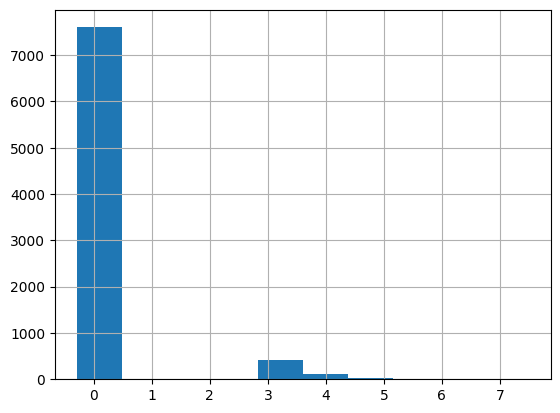

In [ ]:
#df["EmbeddedFile"].hist()

In [ ]:
'''
print(len(df[df['Class'] == "Malicious"]))

print(len(df[(df["Class"] == 'Malicious') & (df["RichMedia"] == '-1')]))
print(len(df[(df["Class"] == 'Benign') & (df["RichMedia"] == '-1')]))
'''

0
0
0


In [ ]:
#print(df["XFA"].value_counts())

XFA
1    7775
2     396
0      19
Name: count, dtype: int64
